
Here we analyze open COVID-19 data from https://ourworldindata.org/ to answer the following questions:

1.From the start of vaccine availability, which country needed the most time to make vaccine available for all groups of people?

2 Which of the following indices ,Government Support Index, Vaccination Policy index correlates the highest  with the 7 day averaged number of vaccinations per million people for the top 3 countries from above?

3 Which countries had the most similar government support indexes?

Additional data from:

    https://www.bsg.ox.ac.uk/research/research-projects/covid-19-government-response-tracker
This work is licensed under a Creative Commons Attribution 4.0 International license. 

## **Load the Data**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#External Dataset
df = pd.read_csv('https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/OxCGRT_latest.csv', parse_dates=[5], low_memory = False)
#COVID DATASET
dh = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',parse_dates = [3],low_memory=False)


In [ ]:
print(df.columns)
print(dh.columns)

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'H8_Protection of elderly people', 'H8_Flag', 'M1_Wildcard',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'Stringenc

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv) for df.And for dh [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

# **1**.From the start of vaccine availability, which country needed the most time to make vaccine available for all groups of people?



### We use the Vaccination availability Index , which is an ordinal variable

0 - No availability

1 - Availability for ONE of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups

2 - Availability for TWO of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups

3 - Availability for ALL of following: key workers/ clinically vulnerable groups (non elderly) / elderly groups

4 - Availability for all three plus partial additional availability (select broad groups/ages)

5 - Universal availability

In [ ]:
#Excluding Some countries have still not had universal vaccine availability.
#countries that use regional - unpopular vaccines 
#Some countries went lower in vaccine availability index, thus negative values.

pd.options.display.max_rows = 5
pd.options.display.max_columns = 5
df.columns = [c.replace(' ', '_') for c in df.columns] #replacing spaces with underscores for column name
dh = dh.rename(columns = {'date' : 'Date'})#consistent naming for both df's

#Universal Availability
df1 = df.loc[df.H7_Vaccination_policy == 5,['CountryName', 'Date']].drop_duplicates(subset = "CountryName") 
df1.set_index('CountryName', inplace=True)

#Less than universal availability
df2 = df.loc[(df.H7_Vaccination_policy < 5)& (df.H7_Vaccination_policy > 0) ,['CountryName', 'Date']].drop_duplicates(subset = "CountryName")
df2.set_index('CountryName', inplace=True)

#Merging datasets
df3 = pd.merge(df1, df2, on="CountryName")
df3 = df3.rename(columns = {'Date_x' : 'Less than Universal Availability', 'Date_y' : 'Universal Availability Date'})

#No of days between Universal availability and less.
df3["days"] = df3["Less than Universal Availability"] - df3["Universal Availability Date"] 

#To get maximum days 
dg = df3.sort_values(by=['days'], ascending = False)
dg


,Less than Universal Availability,Universal Availability Date,days
CountryName,,,
Puerto Rico,2021-10-05,2020-12-15,294 days
Faeroe Islands,2021-09-28,2020-12-30,272 days
...,...,...,...
Bahrain,2020-12-25,2021-03-15,-80 days
Congo,2021-04-20,2021-08-17,-119 days


The negative values simply mean the countries had vaccines available to more groups of people  earlier and lost the capacity with time.

['Faeroe Islands', 'Slovenia', 'Qatar']


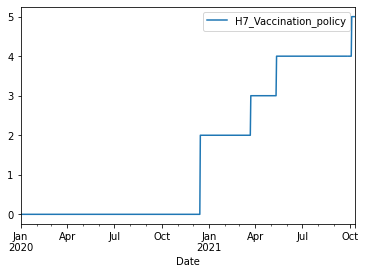

In [ ]:
#Plotting maximum days country Vaccination policy
df_lt = df[df.CountryName == dg.index[0] ][['Date', 'H7_Vaccination_policy']]
    
df_lt.set_index('Date', inplace=True)
df_lt.plot()


# 2  Which of the following indices ,Government Support Index, Vaccination Policy index correlates with the highest number of vaccination per million people for the top 3 countries from above?

Government Response Index and Vaccination Policy index correlation with new vaccinations per million respectively for  Faeroe Islands is : 0.30242883702949735 -0.17368109214606567
Government Response Index and Vaccination Policy index correlation with new vaccinations per million respectively for  Slovenia is : -0.31661857382277997 0.3653257096418036
Government Response Index and Vaccination Policy index correlation with new vaccinations per million respectively for  Qatar is : 0.5164557998237801 0.3659135743707165


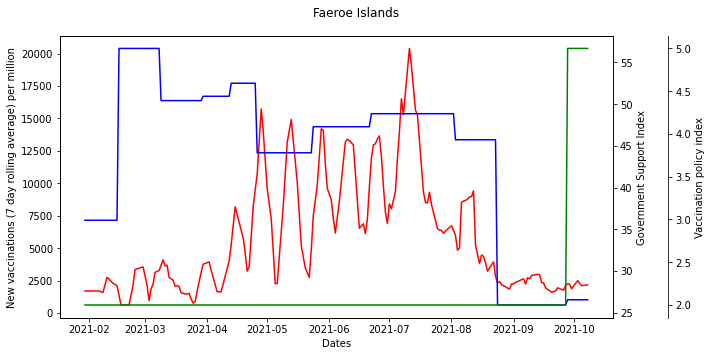

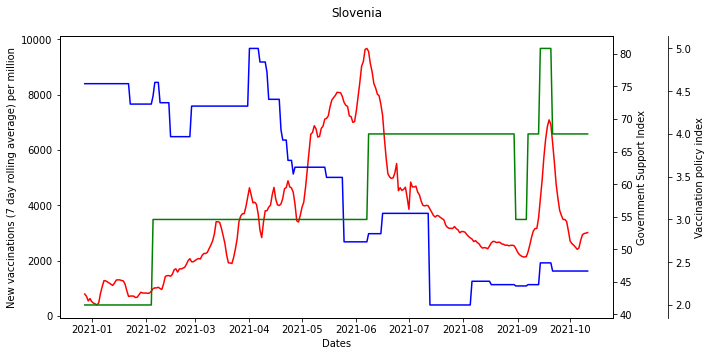

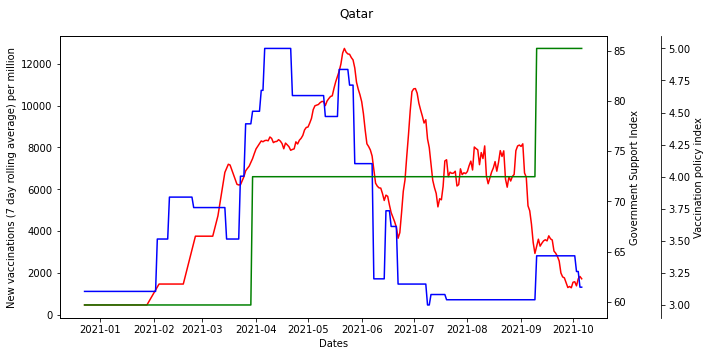

In [ ]:

from matplotlib.pyplot import figure
def  find_corr_countries(country):

  new_vacc = "new_vaccinations_smoothed_per_million"
  df_d= dh[dh["location"]== country][['Date',new_vacc]] #New vaccination per million data from OWID dataset
 
  df_i = df[df["CountryName"]== country][['Date',"CountryName","GovernmentResponseIndex","H7_Vaccination_policy"]]
  #Filtering relevant columns dataset from OxCGRT Dataset
  

  df_3 = pd.merge(df_i, df_d, on="Date") #Merge Dataframes
  df_3 = df_3.dropna()#Remove na values
  dates = df_3["Date"] #X axis
  vacc = df_3[new_vacc] #Y1 axis
  gov_idx = df_3["GovernmentResponseIndex"] #Y2 Axis
  vacc_idx = df_3["H7_Vaccination_policy"]#Y3 Axis
  
  
  #Plotting
  fig,ax1 = plt.subplots(1,1)
  
  fig.set_figheight(5)
  fig.set_figwidth(10)
  fig.suptitle(country)
  twin1 = ax1.twinx() #Twin axes 
  twin2 = ax1.twinx()
  twin2.spines["right"].set_position(("axes", 1.1))
  twin1.set_ylabel("Government Support Index")
  twin2.set_ylabel("Vaccination policy index")
  ax1.plot(dates,vacc , "r-")
  twin1.plot(dates,gov_idx,"b-")
  twin2.plot(dates,vacc_idx, "g")
  a = ax1.set_xlabel("Dates")
  b = ax1.set_ylabel("New vaccinations (7 day rolling average) per million")
  plt.tight_layout()
  plt.subplots_adjust(top=0.900)

 
  print("Government Response Index and Vaccination Policy index correlation with new vaccinations per million respectively for " , country , "is :",vacc.corr(gov_idx), vacc.corr(vacc_idx))

#To Find Top 3 countries common to both datasets as some countries only in external dataset.
top_3_countries=[]
for c in dg.index[:]:
  if c in set(dh.location) and len(top_3_countries)<3:
    top_3_countries.append(c)


#Plotting 3 graphs
for c in top_3_countries:

     find_corr_countries(c)





While  Government Response Index takes into account factors(non vacccine related) such as school closure, workplace closures , events etc (more info [here](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md)) we see there are significant correlations on either side (positive and negative) for both these indices which means they can be used for further causation analysis.



# 3.Which countries had the most similar government response indexes?




### Imputation for NAN's

In [ ]:
from sklearn.impute import KNNImputer
pre_imput = df.loc[:,["Date","CountryName","GovernmentResponseIndex"]]
pr = pre_imput
#pivot table
pre_imput = pd.pivot_table(pre_imput, values = ['GovernmentResponseIndex'], index=['CountryName'], columns = 'Date')
imputer = KNNImputer(n_neighbors=5)
post_imput = pd.DataFrame(imputer.fit_transform(pre_imput), columns = pre_imput.columns)     
post_imput.insert(0, "CountryName", pre_imput.index)
post_imput.set_index("CountryName", inplace = True)


### Squareform Matrix

[0.26240495 0.28763271 0.29391498 ... 0.21091277 0.33737878 0.14583697]


Text(0.5, 1.2, "BrayCurtis Distance matrix between countries' responses")

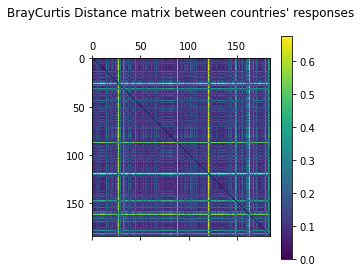

In [ ]:
from scipy.spatial.distance import pdist,squareform

distances = pdist(post_imput.values, metric = 'braycurtis')

a = squareform(distances)
plt.matshow(a)
plt.colorbar()
plt.title("BrayCurtis Distance matrix between countries' responses", y = 1.2)


### Dendrogram for Hierarchical Clustering

Text(0.5, 0, 'Covid 19 Government Response Index similarity using braycurtis distance , ward')

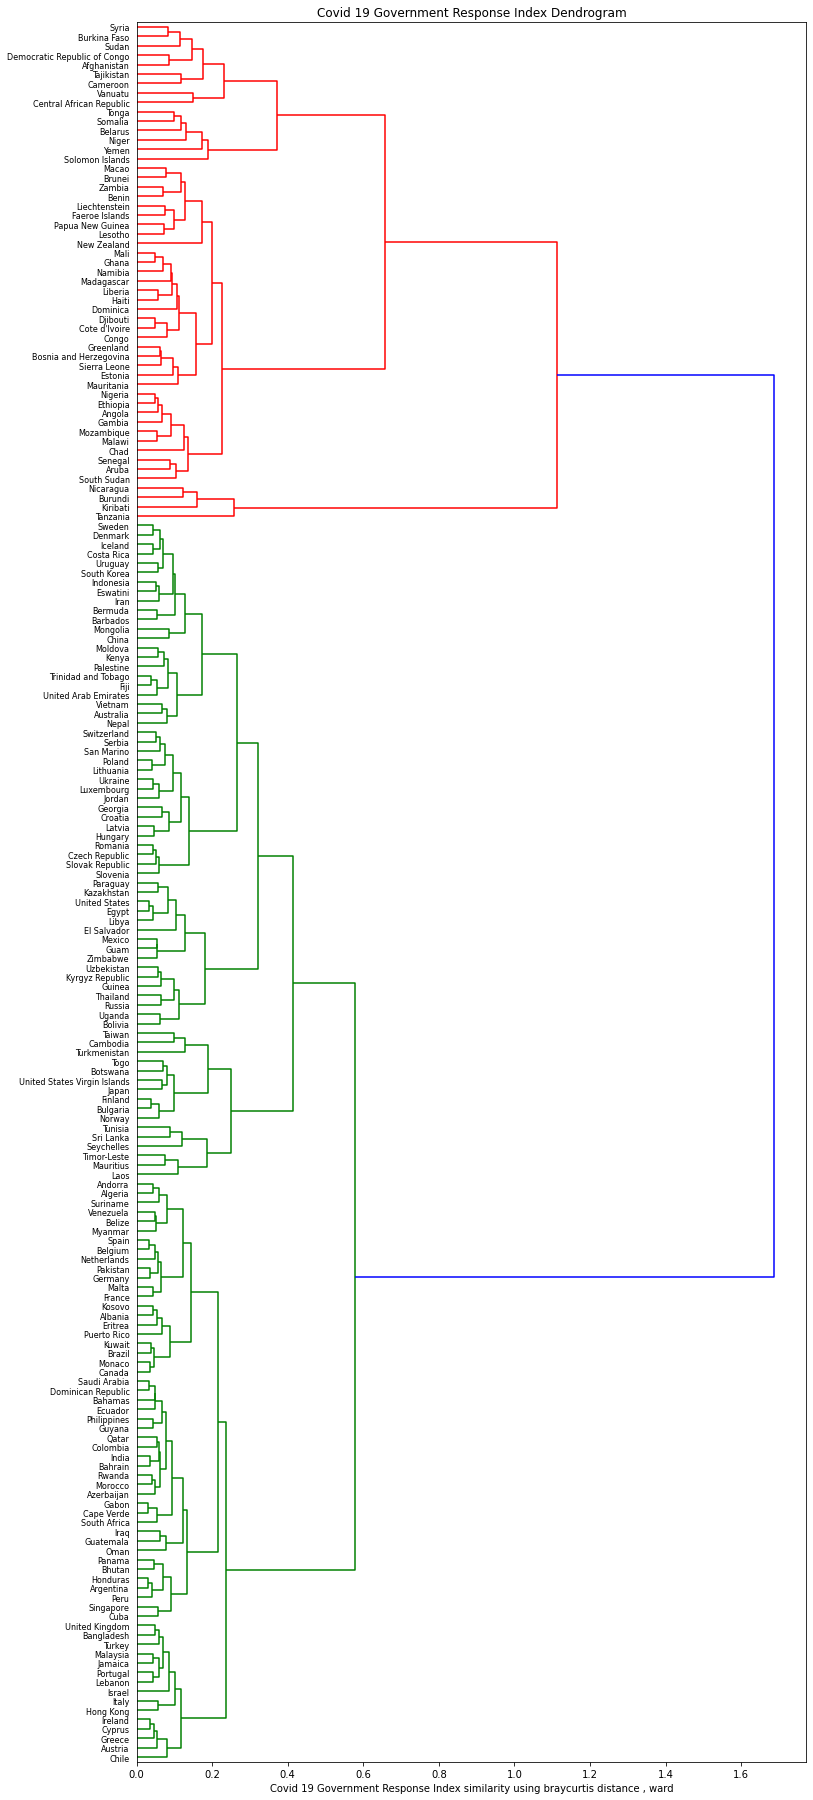

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

fig = plt.figure(figsize = (12,32))
plt.title("Covid 19 Government Response Index Dendrogram")
dendrogram(linkage(distances,"ward"), labels =post_imput.index , orientation = 'right', leaf_font_size = 8)
plt.xlabel("Covid 19 Government Response Index similarity using braycurtis distance , ward" )

It's interesting to see that countries that are really far apart have such similar government response levels. Roughly at 0.5 distance we see 4 big clusters. We will pick some countries to illustrate if they match with dendrogram

### Plot of some countries with similar Government response index

Text(0.5, 1.0, 'COVID 19 Government Response Index of similar countries')

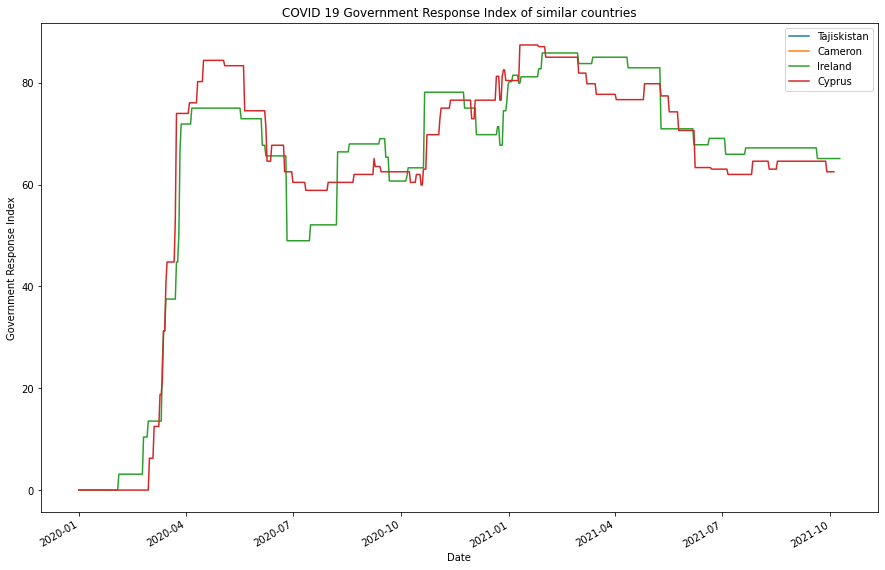

In [ ]:
import seaborn as sns
sns.set_palette("tab10", n_colors=10 )
countries = ["Tajiskistan","Cameron","Ireland", "Cyprus"]
countrynames = []
column = "GovernmentResponseIndex"

plt.figure(figsize = (15,10))
ax = plt.axes()
pr.dropna()
for c in countries:
  pr[pr.CountryName == c].plot(x = 'Date', y = column, ax = ax)
  countrynames.append(c)

plt.ylabel("Government Response Index")
plt.legend(countrynames)
plt.title('COVID 19 Government Response Index of similar countries')


Indeed from the graph , we see  Tajikistan Camerson are very close to each other in their government response in contrast with Ireland , Cyprus as we expected from the dendrogram